# Happiness Survey Data Cleaning

The first part of any analysis is to read in your data and see what needs to be cleaned up before you start evaluating it

For this analysis, we will be looking at happiness survey data from Somerville residents.

https://catalog.data.gov/dataset/somerville-happiness-survey-responses-2011-2013-2015

In [84]:
# import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
survey_data_raw = pd.read_csv('Somerville_Happiness_Survey_responses_-_2011__2013__2015.csv')
survey_data_raw.head()

,Combined_ID,Year,How.happy.do.you.feel.right.now.,How.satisfied.are.you.with.your.life.in.general.,How.satisfied.are.you.with.Somerville.as.a.place.to.live.,In.general..how.similar.are.you.to.other.people.you.know._2011,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.,How.satisfied.are.you.with.your.neighborhood.,How.proud.are.you.to.be.a.Somerville.resident._2015,How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015,...,What.is.your.race.or.ethnicity._2015,Do.you.have.children.age.18.or.younger.who.live.with.you.,Describe.your.housing.status.in.Somerville.,Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.,How.long.have.you.lived.here.,What.is.your.annual.household.income.,What.neighborhood.do.you.live.in.,Are.you.a.student.,Ward,Precinct
0,1,2015,7.0,5.0,7.0,NaN,NaN,5.0,9.0,3.0,...,"White, Hispanic / Latino",No,Rent,No,4-7 years,"$100,000 to $149,999",Winter Hill,No,4.0,3.0
1,2,2015,8.0,8.0,7.0,NaN,NaN,8.0,7.0,3.0,...,White,No,Rent,Yes,1-3 years,"$25,000 to $49,999",Teele Square,Yes,7.0,2.0
2,3,2015,5.0,9.0,6.0,NaN,NaN,7.0,5.0,3.0,...,White,No,Rent,No,21 years or more,"$25,000 to $49,999",Ward 3,No,3.0,2.0
3,4,2015,5.0,8.0,9.0,NaN,NaN,9.0,9.0,5.0,...,White,No,Own,No,16-20 years,NaN,Union Square,No,3.0,1.0
4,5,2015,7.0,9.0,8.0,NaN,NaN,7.0,7.0,5.0,...,White,Yes,Own,No,4-7 years,"$150,000 or more",Near the hospital,No,5.0,3.0


Let's take a look at all the columns

In [5]:
survey_data_raw.columns

Index(['Combined_ID', 'Year', 'How.happy.do.you.feel.right.now.',
       'How.satisfied.are.you.with.your.life.in.general.',
       'How.satisfied.are.you.with.Somerville.as.a.place.to.live.',
       'In.general..how.similar.are.you.to.other.people.you.know._2011',
       'When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.',
       'How.satisfied.are.you.with.your.neighborhood.',
       'How.proud.are.you.to.be.a.Somerville.resident._2015',
       'How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015',
       'The.availability.of.affordable.housing_2011',
       'How.would.you.rate.the.following..The.cost.of.housing.',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools.in.your.community._2011',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools.',
       'How.would.you.rate.the.following..The.beauty.or.physical.setting_2011',
       'How.would.you.rate.t

It is good to have the reference of what the original questions were, but these column names aren't ideal for coding. We will 

In [75]:
survey_data = survey_data_raw.rename(columns={'How.happy.do.you.feel.right.now.': 'Happiness Felt',
       'How.satisfied.are.you.with.your.life.in.general.': 'Life Satisfaction',
       'How.satisfied.are.you.with.Somerville.as.a.place.to.live.': 'Sommerville Satisfaction',
       'In.general..how.similar.are.you.to.other.people.you.know._2011': 'Similarity',
       'When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.':'Advice',
       'How.satisfied.are.you.with.your.neighborhood.':'Neighborhood Satisfaction',
       'How.proud.are.you.to.be.a.Somerville.resident._2015':'Somerville Pride',
       'How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015':'City Service Info',
       'The.availability.of.affordable.housing_2011':'Affordable Housing',
       'How.would.you.rate.the.following..The.cost.of.housing.':'Housing Cost',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools.in.your.community._2011':'Public Schools Comm',
       'How.would.you.rate.the.following..The.overall.quality.of.public.schools.':'Public Schools Overall',
       'How.would.you.rate.the.following..The.beauty.or.physical.setting_2011':'Beauty',
       'How.would.you.rate.the.following..The.beauty.or.physical.setting.of.Somerville_2013':'Beauty of Somerville',
       'How.would.you.rate.the.following..The.effectiveness.of.the.local.police_2011_2013':'Police Effectiveness',
       'How.would.you.rate.the.following..Your.trust.in.the.local.police_2015':'Police Trust',
       'How.would.you.rate.the.following..The.maintenance.of.streets..sidewalks..and..squares_2013':'Street Maintenance 2013',
       'How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks_2015':'Street Maintenance 2015',
       'How.would.you.rate.the.following..The.availability.of.social.community.events':'Community Events',
       'How.safe.do.you.feel.walking.in.your.neighborhood.at.night_2013':'Night Safety 2013',
       'How.safe.do.you.feel.walking.in.your.community.at.night._2015':'Night Safety 2015',
       'How.satisfied.are.you.with.the.beauty.or.physical.setting.of.your.neighborhood.':'Neighborhood Beauty',
       'How.satisfied.are.you.with.the.appearance.of.parks.in.your.neighborhood._2013':'Neighborhood Parks 2013',
       'How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood.':'Neighborhood Parks',
       'What.is.your.sex.':'Sex', 
        'What.is.your.gender._2011':'Gender', 
        'Age.':'Age',
       'Marital.status._2011':'Marital Status',
       'What.language..other.than.English..do.you.speak.at.home._2015':'Language at Home',
       'What.is.your.race_2011_2013':'Race 2013',
       'Are.you.of.Hispanic..Latino..or.Spanish.origin._2013':'Hispanice Latino Spanish',
       'What.is.your.race.or.ethnicity._2015':'Race 2015',
       'Do.you.have.children.age.18.or.younger.who.live.with.you.':'Children < 18',
       'Describe.your.housing.status.in.Somerville.':'Housing Status',
       'Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.':'Move Away',
       'How.long.have.you.lived.here.':'Time in Somerville',
       'What.is.your.annual.household.income.':'Household Income',
       'What.neighborhood.do.you.live.in.':'Neighborhood',
        'Are.you.a.student.':'Student'})

In [7]:
survey_data.head()

,Combined_ID,Year,Happiness Felt,Life Satisfaction,Sommerville Satisfaction,Similarity,Advice,Neighborhood Satisfaction,Somerville Pride,City Service Info,...,Race 2015,Children <18,Housing Status,Move Away,Time in Somerville,Household Income,Neighborhood,Student,Ward,Precinct
0,1,2015,7.0,5.0,7.0,NaN,NaN,5.0,9.0,3.0,...,"White, Hispanic / Latino",No,Rent,No,4-7 years,"$100,000 to $149,999",Winter Hill,No,4.0,3.0
1,2,2015,8.0,8.0,7.0,NaN,NaN,8.0,7.0,3.0,...,White,No,Rent,Yes,1-3 years,"$25,000 to $49,999",Teele Square,Yes,7.0,2.0
2,3,2015,5.0,9.0,6.0,NaN,NaN,7.0,5.0,3.0,...,White,No,Rent,No,21 years or more,"$25,000 to $49,999",Ward 3,No,3.0,2.0
3,4,2015,5.0,8.0,9.0,NaN,NaN,9.0,9.0,5.0,...,White,No,Own,No,16-20 years,NaN,Union Square,No,3.0,1.0
4,5,2015,7.0,9.0,8.0,NaN,NaN,7.0,7.0,5.0,...,White,Yes,Own,No,4-7 years,"$150,000 or more",Near the hospital,No,5.0,3.0


Now that we have all the columns renamed we can start looking more closely at them and start feature engineering

For instance, some columns we can combine into one

In [76]:
survey_data['Street Maintenance'] = survey_data['Street Maintenance 2013'].fillna(0) + survey_data['Street Maintenance 2015'].fillna(0)
survey_data = survey_data.drop(['Street Maintenance 2013', 'Street Maintenance 2015'], axis=1)

survey_data['Night Safety'] = survey_data['Night Safety 2013'].fillna(0) + survey_data['Night Safety 2015'].fillna(0)
survey_data = survey_data.drop(['Night Safety 2013', 'Night Safety 2015'], axis=1)

#survey_data['Race'] = pd.concat(pd.DataFrame(survey_data)['Race 2013'], pd.DataFrame(survey_data)['Race 2015'])
#survey_data = survey_data.drop(['Race 2013', 'Race 2015'], axis=1)

survey_data.columns

Index(['Combined_ID', 'Year', 'Happiness Felt', 'Life Satisfaction',
       'Sommerville Satisfaction', 'Similarity', 'Advice',
       'Neighborhood Satisfaction', 'Somerville Pride', 'City Service Info',
       'Affordable Housing', 'Housing Cost', 'Public Schools Comm',
       'Public Schools Overall', 'Beauty', 'Beauty of Somerville',
       'Police Effectiveness', 'Police Trust', 'Community Events',
       'Neighborhood Beauty', 'Neighborhood Parks 2013', 'Neighborhood Parks',
       'Sex', 'Gender', 'Age', 'Marital Status', 'Language at Home',
       'Race 2013', 'Hispanice Latino Spanish', 'Race 2015', 'Children < 18',
       'Housing Status', 'Move Away', 'Time in Somerville', 'Household Income',
       'Neighborhood', 'Student', 'Ward', 'Precinct', 'Street Maintenance',
       'Night Safety'],
      dtype='object')

Now we can start thinking about how we want to treat each of the variables. First, let's get an idea of how big our data set is, then we'll go through each of the variables and see if we need to make any modifications to them.

In [74]:
survey_data.shape

(6387, 41)

This is not a huge data set, so we might not want to throw out too many missing values.

## Happiness Felt

In [23]:
survey_data.groupby('Happiness Felt').size()

Happiness Felt
1.0       106
2.0        57
3.0       155
4.0       210
5.0       370
5.5         9
6.0       543
6.5         8
7.0      1201
7.5        19
8.0      1822
8.5        13
9.0      1011
9.5         6
10.0      886
42.0        1
57.0        1
77.0        1
88.0        1
810.0       1
dtype: int64

Looks like we have some outliers. Let's take a look at them and make sure it's safe to exclude them

In [24]:
survey_data[survey_data['Happiness Felt'] > 10]

,Combined_ID,Year,Happiness Felt,Life Satisfaction,Sommerville Satisfaction,Similarity,Advice,Neighborhood Satisfaction,Somerville Pride,City Service Info,...,Move Away,Time in Somerville,Household Income,Neighborhood,Student,Ward,Precinct,Street Maintenance,Night Safety,Race
535,530,2011,42.0,2.0,5.0,3.0,10.0,NaN,NaN,NaN,...,NaN,18+,"100,000 and up",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1338,1331,2011,77.0,7.0,9.0,4.0,8.0,NaN,NaN,NaN,...,NaN,12-17 Years,"90,000 - $99,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,1850,2011,810.0,10.0,8.0,7.0,4.0,NaN,NaN,NaN,...,NaN,18+,"60,000 - $69,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,2457,2011,88.0,8.0,8.0,6.0,9.0,NaN,NaN,NaN,...,NaN,0-5 Years,"100,000 and up",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3769,3763,2011,57.0,8.0,8.0,NaN,6.0,NaN,NaN,NaN,...,NaN,0-5 Years,"10,000 - $19,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Although it looks like they might have just made a typo, since Happiness Felt is our predictor variable, it does not make sense to just impute the mean, so we're safer to just exclude these households completely.

In [77]:
survey_data = survey_data[survey_data['Happiness Felt'] <= 10]

## Life Satisfaction

In [78]:
survey_data.groupby('Life Satisfaction').size()

Life Satisfaction
1.0       74
2.0       63
3.0      126
3.5        1
4.0      190
5.0      342
5.5        6
6.0      526
6.5        8
7.0     1045
7.5       10
8.0     1744
8.5       15
9.0     1284
9.5       13
10.0     940
99.0       2
dtype: int64

Again, we have some outliers, so let's take look at those.

In [79]:
survey_data[survey_data['Life Satisfaction'] > 10]

,Combined_ID,Year,Happiness Felt,Life Satisfaction,Sommerville Satisfaction,Similarity,Advice,Neighborhood Satisfaction,Somerville Pride,City Service Info,...,Housing Status,Move Away,Time in Somerville,Household Income,Neighborhood,Student,Ward,Precinct,Street Maintenance,Night Safety
1676,1667,2011,8.0,99.0,8.0,10.0,6.0,NaN,NaN,NaN,...,NaN,NaN,0-5 Years,"60,000 - $69,999",NaN,NaN,NaN,NaN,0.0,0.0
4648,4642,2011,8.0,99.0,9.0,9.0,10.0,NaN,NaN,NaN,...,NaN,NaN,6-11 Years,"100,000 and up",NaN,NaN,NaN,NaN,0.0,0.0


Since their Happiness Felt scores are in a normal range, let's just impute the mean for Life Satisfaction.

In [81]:
survey_data['Life Satisfaction'][survey_data['Life Satisfaction'] > 10] = 5.5

It's possible that Happiness Felt and Life satisfaction are highly correlated and we could remove it completely, so let's check.

In [96]:
survey_data[['Happiness Felt', 'Life Satisfaction']].corr(method='pearson')

,Happiness Felt,Life Satisfaction
Happiness Felt,1.000000,0.788787
Life Satisfaction,0.788787,1.000000


This shows a pretty strong relationship, so we can probably remove it, but let's keep it in for now.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


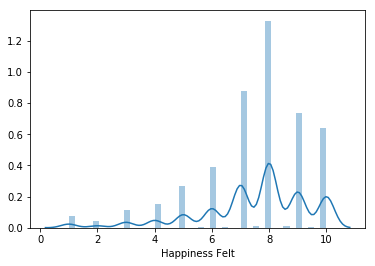

In [30]:
sns.distplot(survey_data['Happiness Felt'])

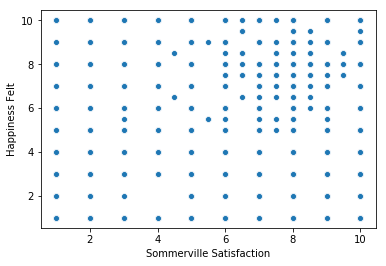

In [47]:
sns.scatterplot(x="Sommerville Satisfaction", y="Happiness Felt", data=survey_data)

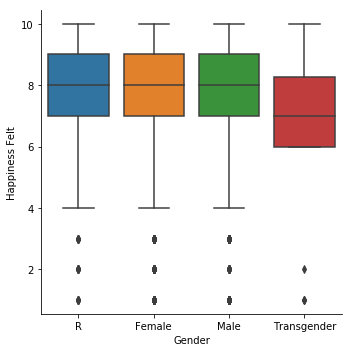

In [63]:
sns.catplot(x="Gender", y="Happiness Felt", kind="box", data=survey_data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


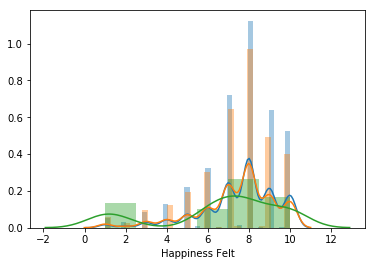

In [57]:
sns.distplot(survey_data.loc[survey_data['Gender'] == 'Female']['Happiness Felt'])
sns.distplot(survey_data.loc[survey_data['Gender'] == 'Male']['Happiness Felt'])
sns.distplot(survey_data.loc[survey_data['Gender'] == 'Transgender']['Happiness Felt'])



In [59]:
survey_data.groupby('Marital Status').size()

Marital Status
Divorced                  503
Married                  2258
R                         274
Single, Never Married    2695
Widowed                   281
dtype: int64

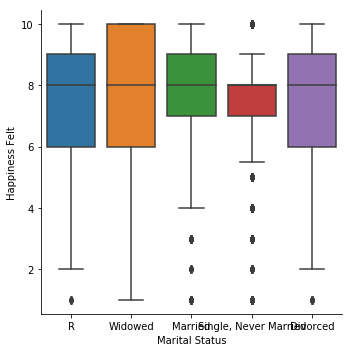

In [62]:
sns.catplot(x="Marital Status", y="Happiness Felt", kind="box", data=survey_data)

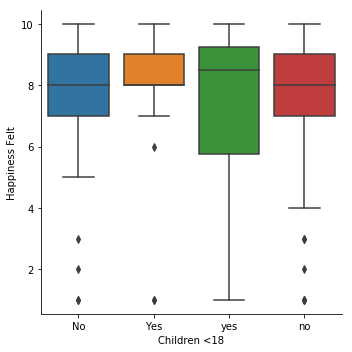

In [64]:
sns.catplot(x="Children <18", y="Happiness Felt", kind="box", data=survey_data)

Looking at each individual pair is going to take some time. So let's look at a correlation matrix of all variables.

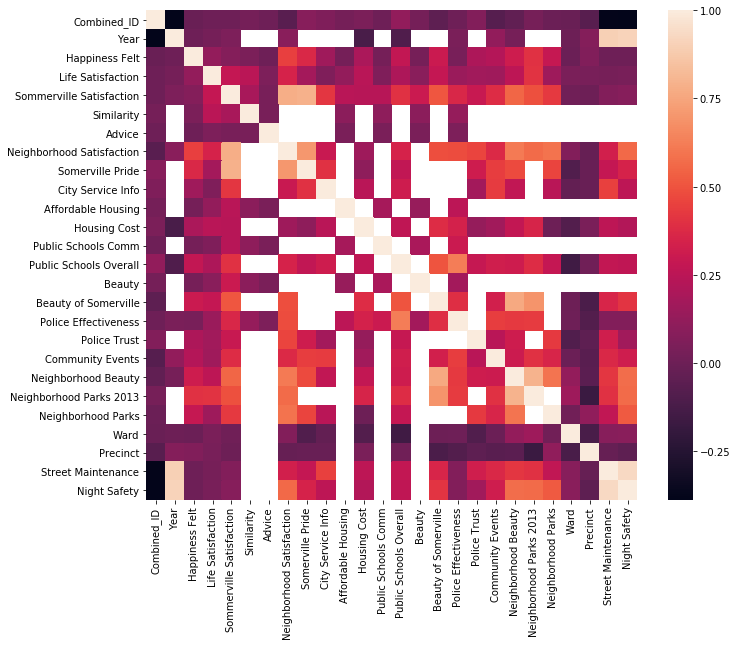

In [43]:
corr = survey_data.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr)